In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
np.random.seed(42)
m = 100 
X = 2*np.random.rand(m,1)
y = 4 + 3*X + np.random.randn(m,1)

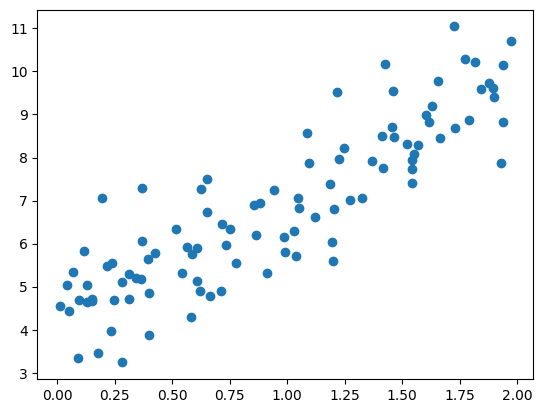

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)

In [5]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_b.shape , X_b.T.shape

((100, 2), (2, 100))

In [8]:
(X_b @ X_b.T).shape

(100, 100)

In [9]:
X_new = np.array([[0],[1]])

In [10]:
X_new
X_new_B = add_dummy_feature(X_new)
X_new_B.shape , theta_best.shape

((2, 2), (2, 1))

In [11]:
y_predict = X_new_B @ theta_best

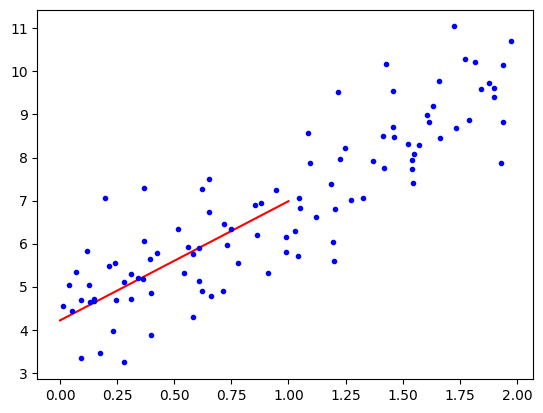

In [12]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)

lin_reg.coef_ , lin_reg.intercept_



(array([[2.77011339]]), array([4.21509616]))

In [14]:
 3232

3232

In [15]:
eta = 0.1 
n_epochs = 1000 
m = len(X_b)

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)


In [17]:
 for  epoch in range(n_epochs):
     gradient = 2/m * X_b.T@(X_b @ theta - y)
     theta = theta - eta*gradient

In [18]:
theta.shape , X_b.T.shape , X_b.shape , (X_b @ theta).shape , (X_b.T@(X_b @ theta)).shape

((2, 1), (2, 100), (100, 2), (100, 1), (2, 1))

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

In [20]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [21]:
theta

array([[4.21076011],
       [2.74856079]])

In [22]:
from sklearn.linear_model import SGDRegressor


In [23]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

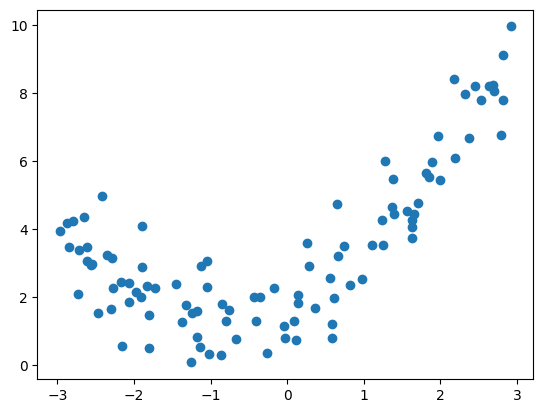

In [24]:
plt.scatter(X,y)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 2 , include_bias = False)
X_poly = poly_feature.fit_transform(X,y)

In [26]:
 X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly , y)

lin_reg.intercept_, lin_reg.coef_


(array([1.78134581]), array([[0.93366893, 0.56456263]]))

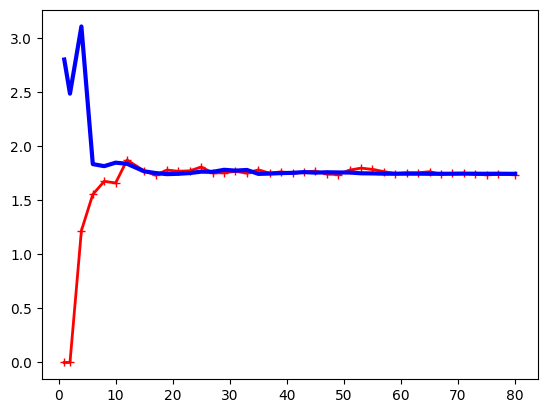

In [28]:
 from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# beautify the figure: add labels, axis, grid, and legend
plt.show()

In [29]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10 , include_bias = False) , 
                                     LinearRegression())

In [30]:
train_sizes, train_scores, valid_scores= learning_curve(polynomial_regression , X, y , train_sizes = np.linspace(0.01,1.0,40) ,cv = 5 ,
              scoring = 'neg_root_mean_squared_error')

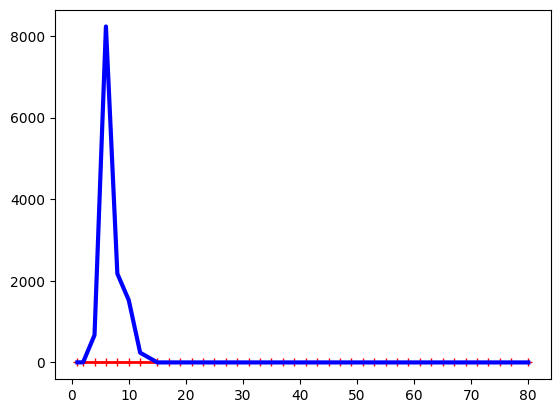

In [31]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")



##### Bias
This part of the generalization error is due to wrong assumptions,
such as assuming that the data is linear when it is actually quadratic.
A high-bias model is most likely to underfit the training data.
##### Variance
This part is due to the model’s excessive sensitivity to small
variations in the training data. A model with many degrees of
freedom (such as a high-degree polynomial model) is likely to have
high variance and thus overfit the training data.

##### Regularized Linear Models
a good way to reduce overfitting is to
regularize the model (i.e., to constrain it): the fewer degrees of freedom it
has, the harder it will be for it to overfit the data. A simple way to regularize
a polynomial model is to reduce the number of polynomial degrees.

In [32]:
 # Here is how to perform ridge regression with Scikit-Learn using a closedform solution (a variant of Equation 4-9 that uses a matrix factorization
# technique by André-Louis Cholesky):
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([[4.82899748]])

In [33]:
# And using stochastic gradient descent:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])
 

array([4.82830117])

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [35]:
sgd_reg = SGDRegressor(penalty = 'l1' , alpha = 0.1 , tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.77557733])

Elastic net regression is a middle ground between ridge regression and lasso
regression. The regularization term is a weighted sum of both ridge and
lasso’s regularization terms, and you can control the mix ratio r. When r = 0,
elastic net is equivalent to ridge regression, and when r = 1, it is equivalent to
lasso regression

So when should you use elastic net regression, or ridge, lasso, or plain linear
regression (i.e., without any regularization)? It is almost always preferable to
have at least a little bit of regularization, so generally you should avoid plain
linear regression. Ridge is a good default, but if you suspect that only a few
features are useful, you should prefer lasso or elastic net because they tend to
reduce the useless features’ weights down to zero, as discussed earlier. In
general, elastic net is preferred over lasso because lasso may behave
erratically when the number of features is greater than the number of training
instances or when several features are strongly correlated.


In [36]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1 , l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.78114505])

In [37]:
# from copy import deepcopy
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
# ## Here is a basic implementation of early stopping:
# X_train , X_valid , y_train , y_valid = X[:80] , X[80:] , y[:80] , y[80:]

# preprocessing = make_pipeline(PolynomialFeatures(degree = 90 ,include_bias = False),
#                               StandardScaler())
# X_train_prep = preprocessing.fit_transform(X_train)
# X_valid_prep = preprocessing.transform(X_valid)

# sgd_reg = SGDRegressor(penalty= None , eta0 = 0.002 , random_state = 42)
# n_epochs = 500
# best_valid_rsme = float('inf')


# for epoch in range(n_epochs):
#     sgd_reg.partial_fit(X_train , y_train)
#     y_valid_predict =  sgd_reg.predict(X_valid_prep)
#     val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
#     if val_error < best_valid_rmse:
#         best_valid_rmse = val_error
#         best_model = deepcopy(sgd_reg)
        

In [38]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [39]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [40]:
# iris.data
# iris.target
# iris.target_names[iris.target]

In [41]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [44]:
X = iris.data[['petal width (cm)']].values 

In [45]:
y = (iris.target_names[iris.target] == 'virginica')

In [46]:
X.reshape(-1,1).shape , y.shape

((150, 1), (150,))

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state =42)

In [48]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [49]:
X_new= np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

In [50]:
decision_boundary = X_new[y_proba[:,1]>=0.5][0,0]

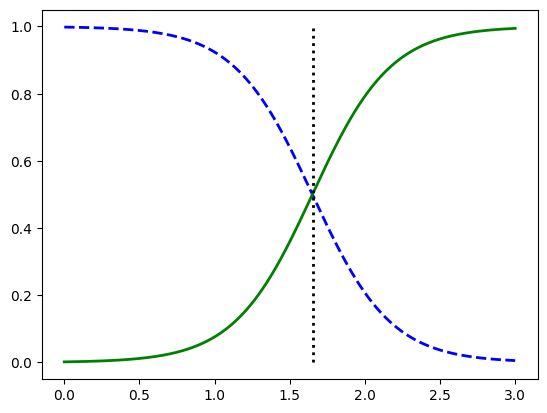

In [51]:
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
label="Decision boundary")
# [...] # beautify the figure: add grid, labels, axis, legend, arrows, and samples
plt.show()


In [52]:
    X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [53]:
softmax_reg.predict([[5, 2]])

array([2])

In [54]:
softmax_reg.predict_proba([[5, 2]]).round(2)


array([[0.  , 0.04, 0.96]])